# Explorative data analysis

## Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def count_features(values, keys):
    """
    Create a dictionary from an occurance matrix and its corresponding keys.
    
    Args:
    - values (numpy array): Occurance matrix where the row corresponds to the document in the corpus and the row to
    the key (e.g. 1-gram or 2-gram).
    - keys (list of str): List of extracted n-grams.
    
    Returns:
    - sorted_zipped_dictionary (dictionary): Returns a dictionary about the frequency of each n-gram in a corpus.
    """
    summed_values = values.sum(axis=0)
    zipped_dictionary = zip(summed_values, keys)
    sorted_zipped_dictionary = sorted(zipped_dictionary, reverse=True)
    return sorted_zipped_dictionary

In [3]:
def build_vocabulary(df, feature_size, n_gram_size):
    """
    tbd.
    """
    corpus = df['processed_text'].values
    vectorizer = CountVectorizer(max_features=feature_size, ngram_range=(n_gram_size, n_gram_size))
    feature_matrix = vectorizer.fit_transform(corpus)
    feature_vocabulary = vectorizer.get_feature_names() # feature order
    return feature_vocabulary, feature_matrix.toarray()

In [4]:
def ngram_statistics(df, select_class, feature_size, n_gram_size):
    """
    tbd.
    """
    selected_df = df.loc[df['class'] == select_class]
    vocabulary, matrix = build_vocabulary(selected_df, feature_size, n_gram_size)
    statistics = count_features(matrix, vocabulary)
    return statistics

In [5]:
def split_tuples(list_1, list_2):
    """
    tbd.
    """
    dict_1 = {}
    for detail in list_1:
        tmp_dict = {detail[1]: detail[0]}
        dict_1.update(tmp_dict)
    
    dict_2 = {}
    for detail in list_2:
        tmp_dict = {detail[1]: detail[0]}
        dict_2.update(tmp_dict)
    
    
    return dict_1, dict_2

In [6]:
def add_dicts(dict_1, dict_2):
    """
    tbd.
    """
    summed_dict = dict_2
    for key in dict_1:
        if key in dict_2:
            summed_dict[key] = dict_2[key] + dict_1[key]
        else:
            summed_dict.update({key: dict_1[key]}) 
    
    return summed_dict

In [7]:
def create_df_from_dict(from_dict, add_class):
    """
    tbd.
    """
    import_dict = {'key': list(from_dict.keys()), 'value': list(from_dict.values())}
    df = pd.DataFrame.from_dict(import_dict)
    df['class'] = add_class
    return df

In [8]:
def get_merged_vocabulary(df, feature_size, n_gram_size):
    """
    For a corpus and n-gram size get the top features and its occurances in the corpus.
    
    Args:
    - df (pandas dataframe): Dataframe to extract the n-grams from.
    - feature_size (int): Defines the size of the features to be extracted (the top features are extracted).
    - n_gram_size (int): Select the considered n-gram size (for example 1-gram or 2-gram).
    
    Returns:
    - df_merge (pandas dataframe): Joined dataframe illustrating which n-grams occur how often.
    """
    # create statistics
    n_gram_0 = ngram_statistics(df, 0, feature_size, n_gram_size)
    n_gram_1 = ngram_statistics(df, 1, feature_size, n_gram_size)
    
    # create dicts from tuples
    dict_0, dict_1 = split_tuples(n_gram_0, n_gram_1)
    
    # create dataframes
    df_0 = create_df_from_dict(dict_0, 0)
    df_1 = create_df_from_dict(dict_1, 1)
    
    # merge dataframes
    df_merge = pd.concat([df_0, df_1], axis=0)
    df_merge.reset_index(drop=True, inplace=True)
    
    return df_merge

## Determine 20 most used 1-gram or 2-gram per class

In [9]:
# import corpus data
corpus = pd.read_csv('{}/{}'.format('data', 'corpus-44898.csv'))

In [10]:
results_1 = get_merged_vocabulary(corpus, 20, 1)
results_2 = get_merged_vocabulary(corpus, 20, 2)

## Barplots

- Plotting the 20 most used unigrams for truthful and fake class.
- Plotting the 20 most used bigrams for truthful and fake class.

In [14]:
def create_plot(df, x, y, group, path, output):
    """
    Create a barplot using a grouping variable.    
    """
    if not os.path.exists(path):
        os.mkdir(path)
    
    %matplotlib inline
    
    sns.set(font_scale = 2)
    sns.set_style('whitegrid')
    g = sns.catplot(
        data=df, kind='bar',
        x=x, y=y, hue=group, 
        palette='Set1', height=8.27, aspect=11.7/8.27
    )
    g.set_xticklabels(rotation=90)
    g.savefig('{}/{}'.format(path, output))

## Unigram

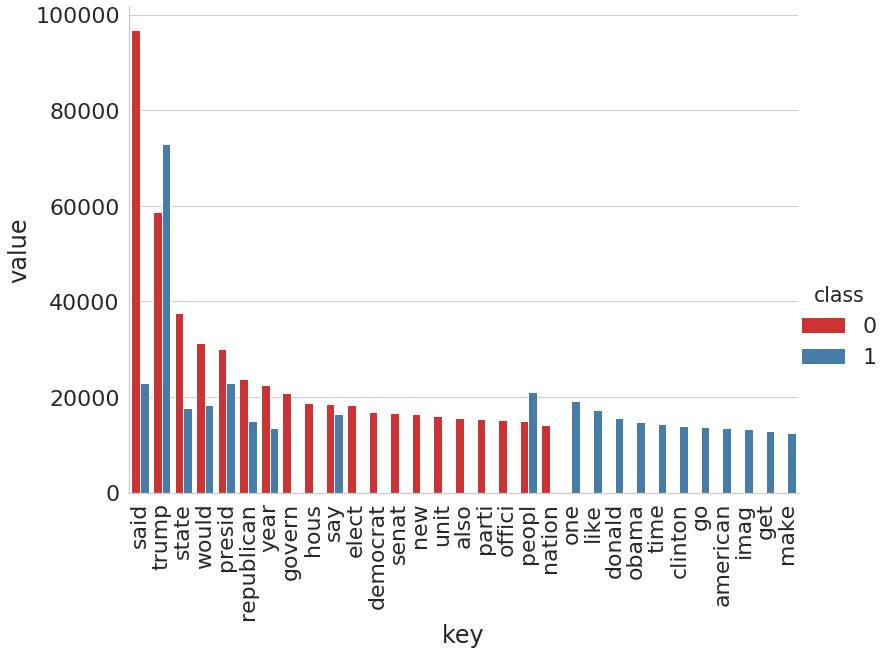

In [12]:
create_plot(results_1, 'key', 'value', 'class', 'output', 'word_analysis_1.png')

## Bigram

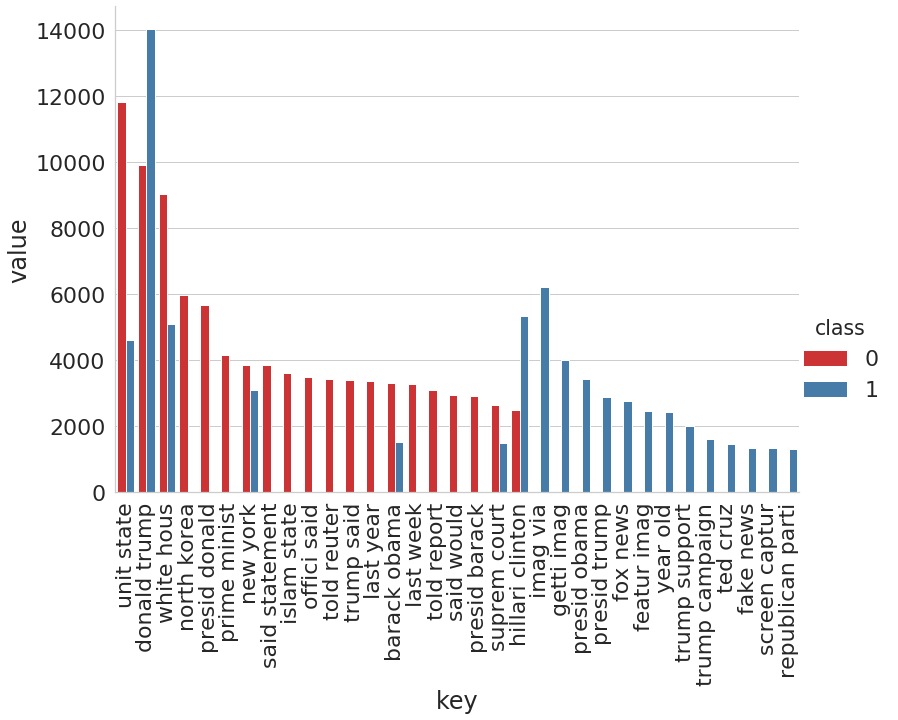

In [13]:
create_plot(results_2, 'key', 'value', 'class', 'output', 'word_analysis_2.png')